In [1]:
In real world this technique not used 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [4]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

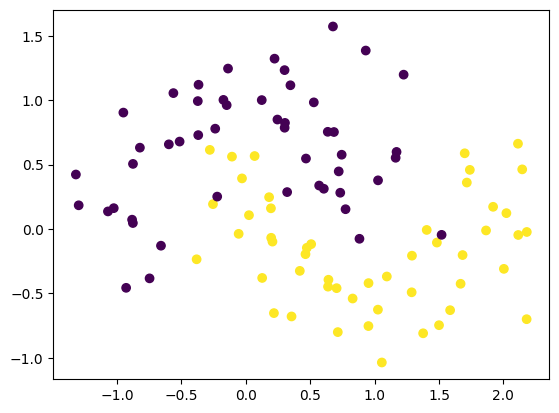

In [5]:
# need for equal size of the data
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [7]:
clf.fit(X,y)

LogisticRegression()

<Axes: >

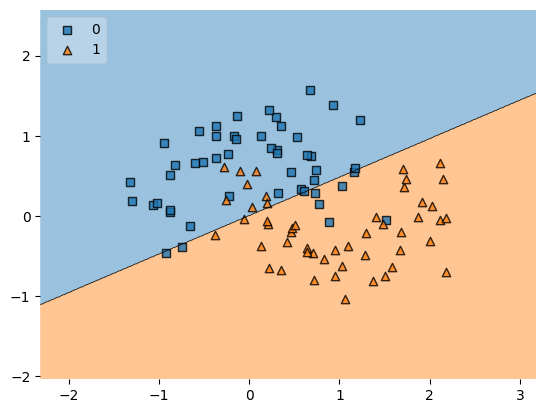

In [8]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype('int'), clf , legend=2)

<Axes: >

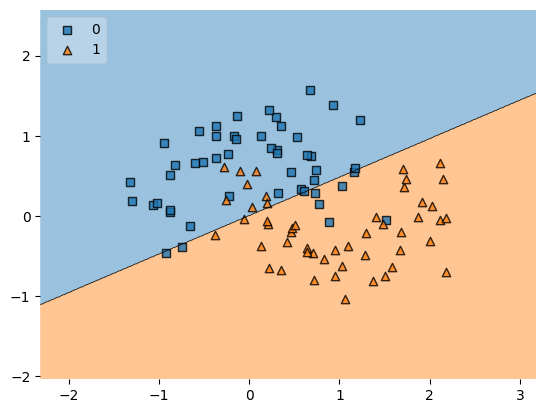

In [9]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype('int'), clf , legend=2)

In [10]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(clf, X, y, scoring='accuracy', cv=10))

0.8300000000000001

In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_trf = poly.fit_transform(X)

In [25]:
clf1 = LogisticRegression()

np.mean(cross_val_score(clf1, X_trf, y, scoring='accuracy', cv=10))

0.9099999999999999

In [28]:
def plot_decision_boundary(X,y, degree=1):

    poly = PolynomialFeatures(degree= degree)
    X_trf = poly.fit_transform(X)

    clf = LogisticRegression()
    clf.fit(X_trf, y)

    # below code use only for plotting a graph

    accuracy = np.mean(cross_val_score(clf, X_trf, y, scoring='accuracy', cv=10))

    a = np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b = np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)

    XX, YY = np.meshgrid(a, b)

    input_array = np.array([XX.ravel(), YY.ravel()]).T

    labels = clf.predict(poly.transform(input_array))

    plt.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.5)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title('Degree : {}, accuracy is {}'.format(degree, np.round(accuracy, 4)))
    

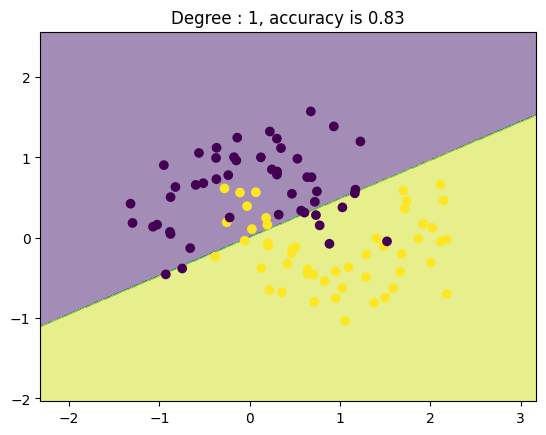

In [29]:
plot_decision_boundary(X, y, degree=1)

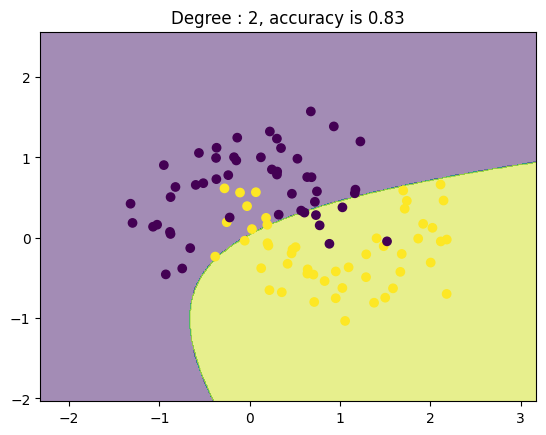

In [30]:
plot_decision_boundary(X, y, degree=2)

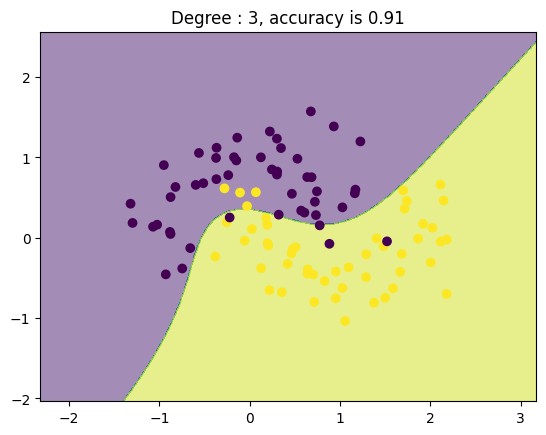

In [31]:
plot_decision_boundary(X, y, degree=3)

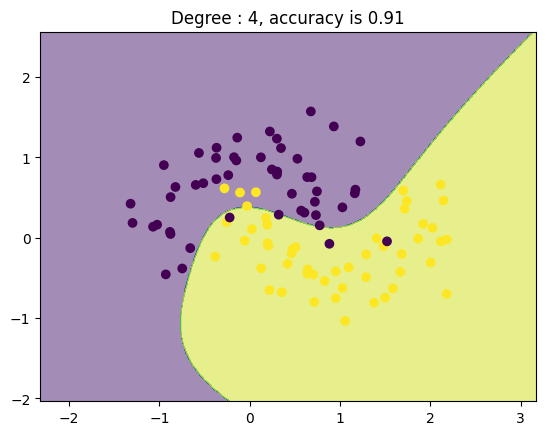

In [33]:
plot_decision_boundary(X, y, degree=4)

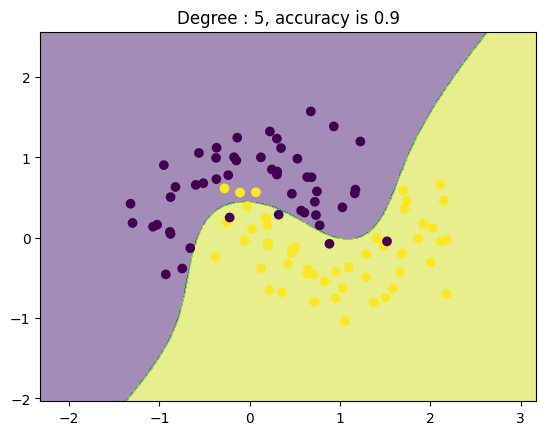

In [34]:
plot_decision_boundary(X, y, degree=5)